Now you will choose multiple independent variables (X1, X2, ...) to fit to Pressure, based on the previous lecture by Luca. You can also change whether the variables should be linear or nonlinear.

You can change the graphical plotting parameters using what you learnt earlier, and also using the following link: https://www.statmethods.net/advgraphs/parameters.html

You can also add parameters into your dataset that you might want to subset to better improve the model (V1, V2, ...)

Then fit a statistical model for the data and examine how well the model fits the data, using the R<sup>2</sup> value and the graph with the fitted line.

To export your graphs: Once you have run the code, right click on the graph and choose "Create New View for Output". a new window will appear and you will be able to right click on each graph and choose "Save image as". Once you have saved all graphs you can close the "Output View" window additional window.

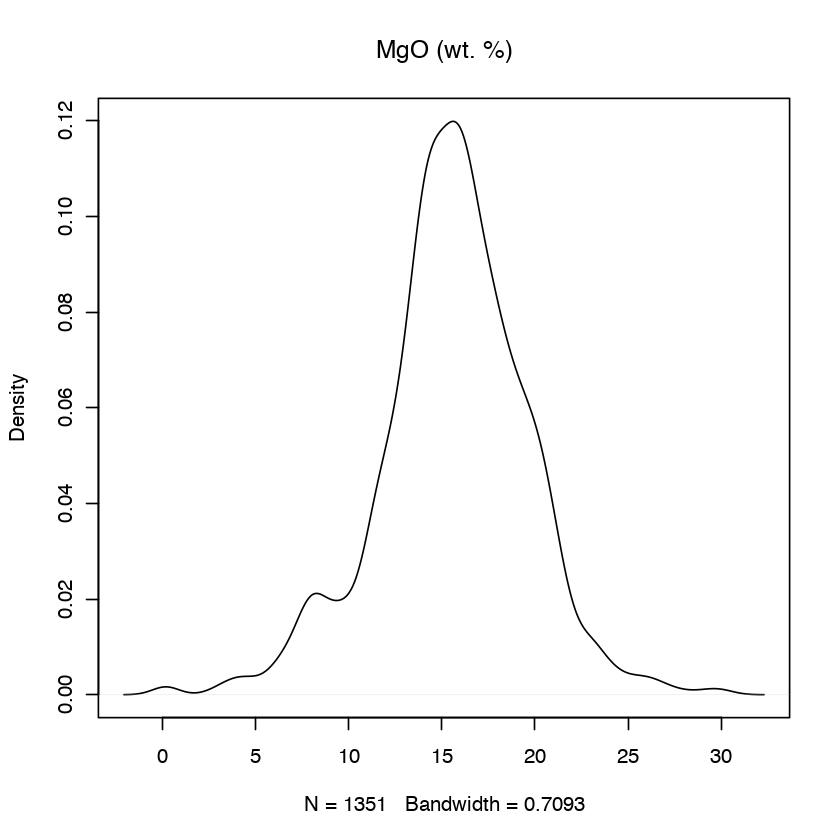

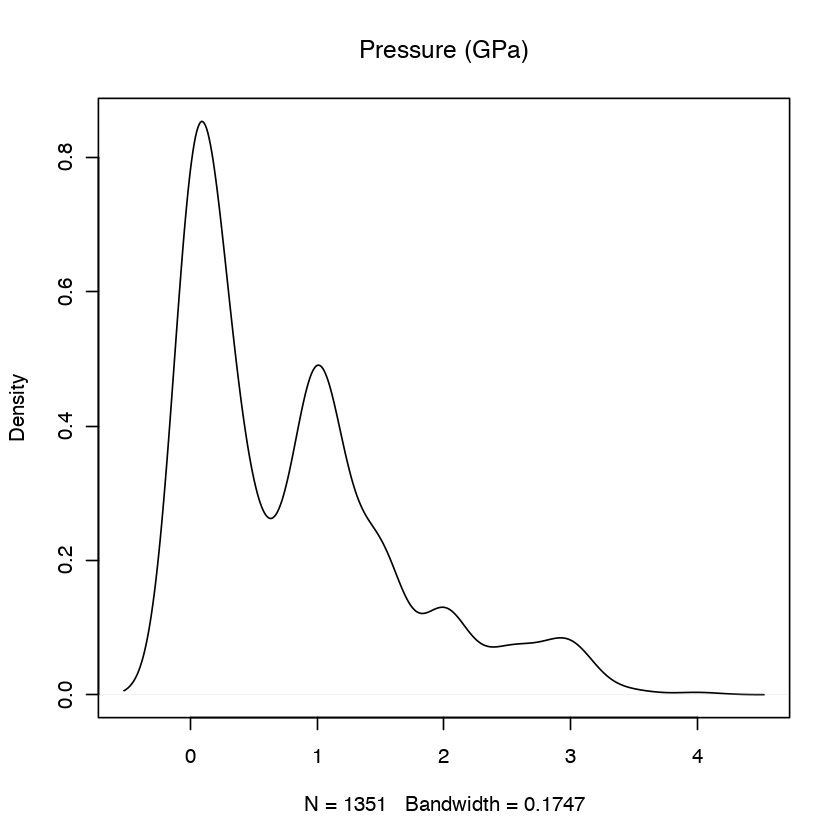

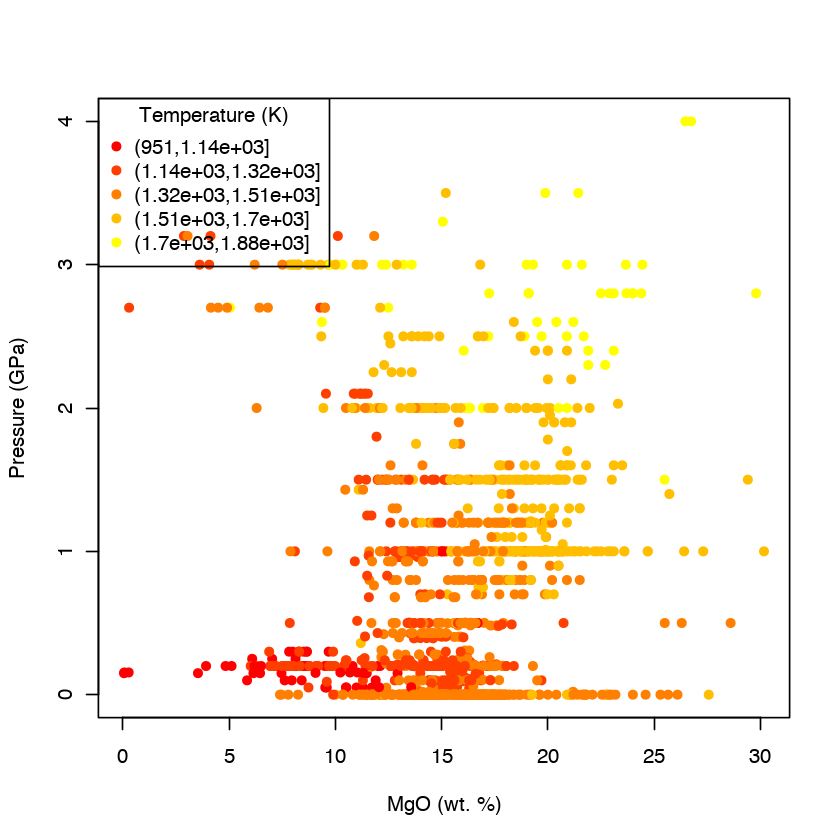

In [19]:
experiments <- read.table("CPX_experiments.txt",sep="\t",header=TRUE)

xvar <- experiments$MgO.cpx
yvar <- experiments$P_GPa

plot(density(xvar,na.rm = TRUE),main = "MgO (wt. %)")
plot(density(yvar,na.rm = TRUE),main = "Pressure (GPa)")

colourvar <- experiments$T_K
colourvarname <- "Temperature (K)"
n.colours <- 5
pal <- colorRampPalette(c("red", "yellow"))

col.points <- pal(n.colours)[cut(colourvar,breaks = n.colours)] #do not change

plot(xvar,yvar,col=col.points,pch=16,cex=1,xlab="MgO (wt. %)",ylab="Pressure (GPa)") 
legend("topleft",title = colourvarname,legend = levels(cut(colourvar,breaks = n.colours)),col = pal(n.colours), pch = 16) #do not change


Now you should create a dataframe to organise the variables that are important for your model. First list the variables and then build the data frame:

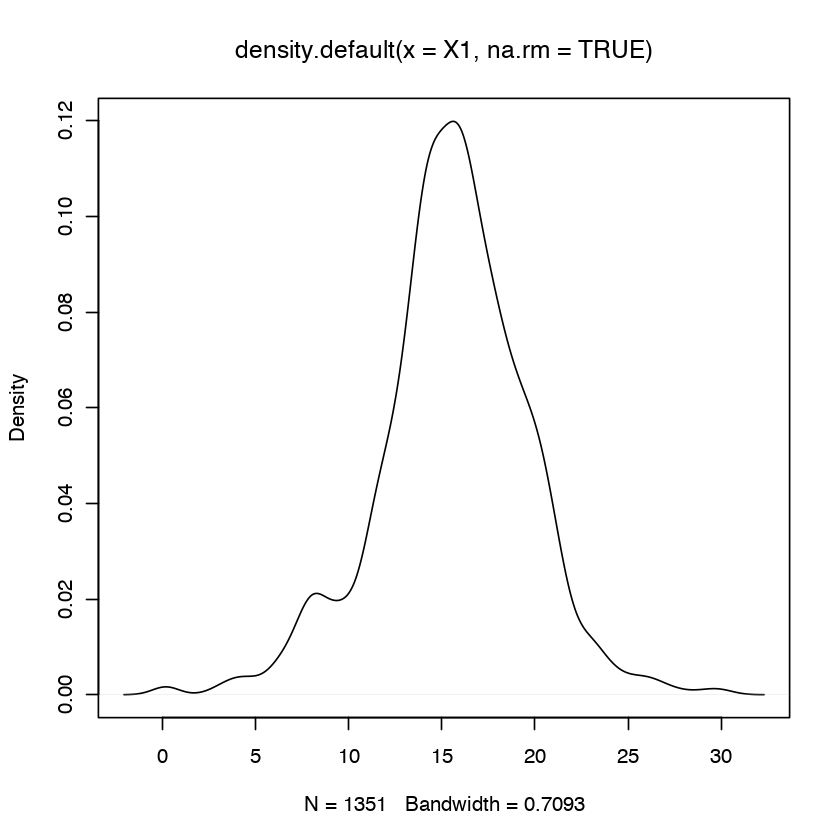

,Y,X1,X2,V1,V2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.2047,15.55,6.72,1448.15,0.2047
2,0.2037,16.36,5.31,1443.15,0.2037
3,0.0500,11.00,1.88,1123.50,0.0500
4,0.0500,11.30,2.34,1123.50,0.0500
5,0.1000,11.90,0.85,1123.50,0.1000
6,0.0500,10.50,1.82,1123.50,0.0500


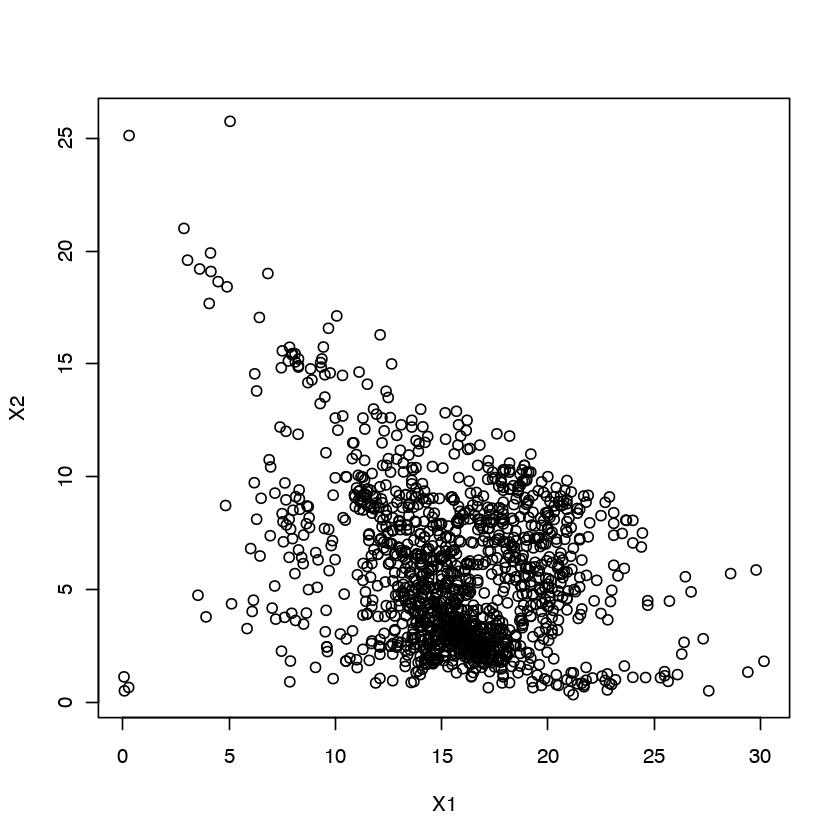

In [21]:
Y <- experiments$P_GPa

X1 <- experiments$MgO.cpx #/ experiments$MgO.liq
X2 <- experiments$Al2O3.cpx #/ experiments$Al2O3.liq

plot(density(X1,na.rm=TRUE))
plot(X1,X2)

V1 <- experiments$T_K
V2 <- experiments$P_GPa

df <- data.frame(Y,X1,X2,V1,V2)

val <- unique(which(is.na(df)==FALSE,arr.ind=TRUE)[,1])

df <- df[val,]

head(df)

If you want to subset the data use the code in the following box, or skip:

In [22]:
ID <- which(df$V1 > 1300 & df$V2 > 1) #print(ID)

df <- df[ID,]

Now fit a model to estimate pressure:


Call:
lm(formula = Y ~ X1 + X2, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.0000 -0.4254 -0.1573  0.3892  2.4685 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.228824   0.270425   4.544 7.56e-06 ***
X1          -0.002833   0.010079  -0.281    0.779    
X2           0.077393   0.013515   5.726 2.18e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5974 on 357 degrees of freedom
Multiple R-squared:  0.1614,	Adjusted R-squared:  0.1567 
F-statistic: 34.36 on 2 and 357 DF,  p-value: 2.254e-14


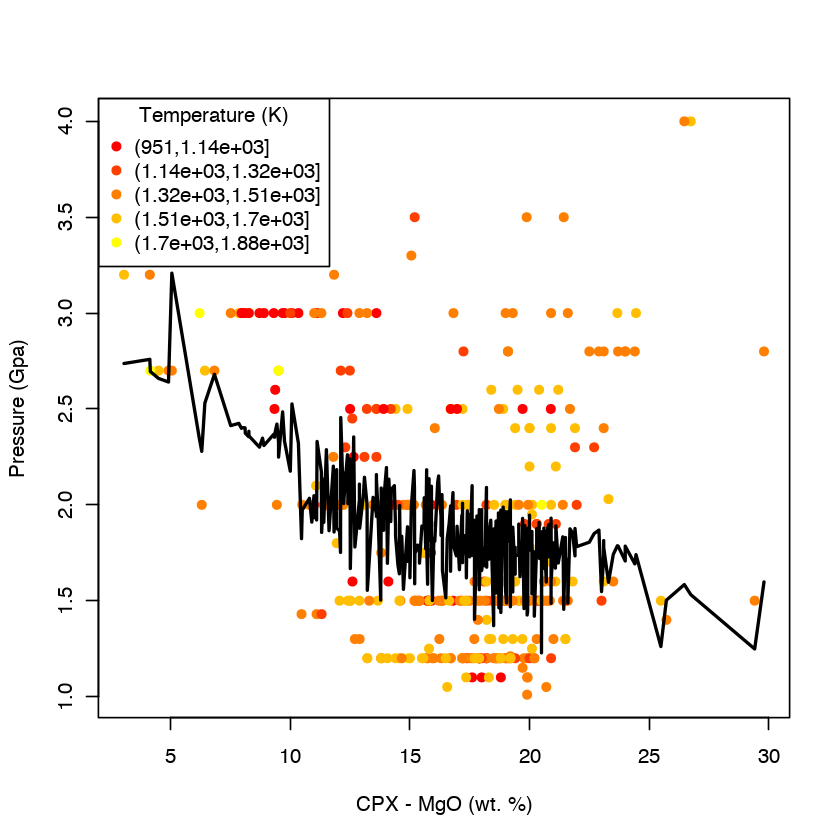

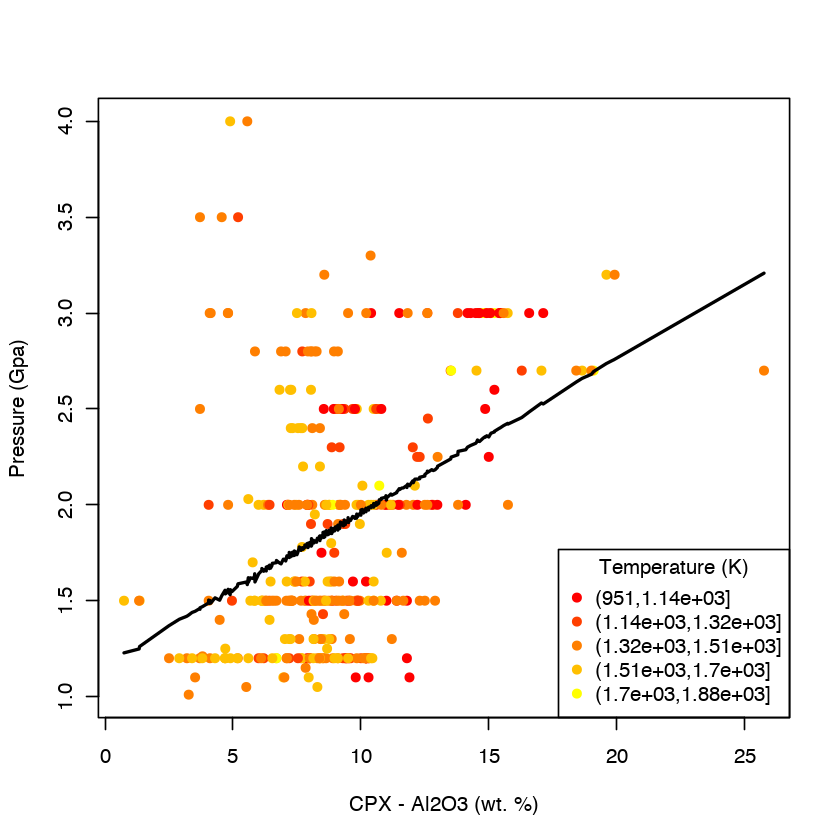

In [23]:
Model <- lm(Y ~ X1 + X2, data=df)
summary(Model)

col.points <- pal(5)[cut(colourvar,breaks = 5)] #do not change

plot(df$X1,df$Y,col=col.points,pch=16,cex=1,xlab="CPX - MgO (wt. %)",ylab="Pressure (Gpa)") 
legend("topleft",title = colourvarname,legend = levels(cut(colourvar,breaks = n.colours)),col = pal(n.colours), pch = 16) #do not change
lines(sort(df$X1), fitted(Model)[order(df$X1)], col="black", type='l',lwd=2) 

plot(df$X2,df$Y,col=col.points,pch=16,cex=1,xlab="CPX - Al2O3 (wt. %)",ylab="Pressure (Gpa)") 
legend("bottomright",title = colourvarname,legend = levels(cut(colourvar,breaks = n.colours)),col = pal(n.colours), pch = 16) #do not change
lines(sort(df$X2), fitted(Model)[order(df$X2)], col="black", type='l',lwd=2) 


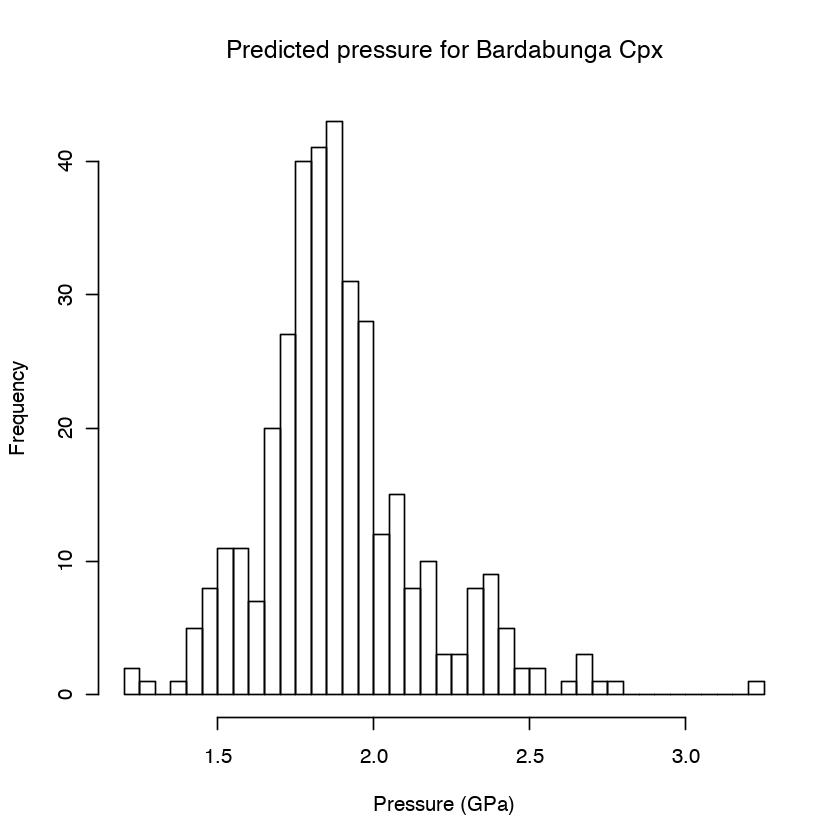

In [26]:
bardabunga <- read.table("cpx_bardabunga.txt",sep="\t",header=TRUE)

bardabunga.pressure <- predict(Model,X1=bardabunga$MgO,X2=bardabunga$Al2O3)

hist(bardabunga.pressure,xlab="Pressure (GPa)",main="Predicted pressure for Bardabunga Cpx",breaks = 50)